In [3]:
import pandas as pd

# Load the dataset from the uploaded file
df = pd.read_csv('/content/MTA_NYCT_Safety_Data__Beginning_2019.csv')

In [5]:
print("First 5 rows of the dataset:")
print(df.head())

First 5 rows of the dataset:
        Month Department                                        Metric  Value
0  04/01/2019        Bus               Bus Collision Per Million Miles  53.04
1  04/01/2019        Bus      Bus Collision Injuries Per Million Miles   3.76
2  04/01/2019        Bus  Bus Customer Accidents per million customers   1.48
3  04/01/2019     Subway                     Subway Customer Accidents   2.80
4  04/01/2019     Subway                                  Subway Fires  57.00


In [6]:
print("\nDataFrame Info:")
df.info()


DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 655 entries, 0 to 654
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Month       655 non-null    object 
 1   Department  655 non-null    object 
 2   Metric      655 non-null    object 
 3   Value       655 non-null    float64
dtypes: float64(1), object(3)
memory usage: 20.6+ KB


In [7]:
print("\nDescriptive Statistics:")
print(df.describe())


Descriptive Statistics:
              Value
count    655.000000
mean     454.993295
std     1201.792022
min        0.000000
25%        2.940000
50%       27.000000
75%       85.000000
max    13170.000000


In [8]:
# Convert 'Month' column to datetime objects
df['Month'] = pd.to_datetime(df['Month'], format='%m/%d/%Y')

# Verify the change by checking the info again
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 655 entries, 0 to 654
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       655 non-null    datetime64[ns]
 1   Department  655 non-null    object        
 2   Metric      655 non-null    object        
 3   Value       655 non-null    float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 20.6+ KB


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a nice style for our plots
sns.set_style("whitegrid")

/tmp/ipython-input-11-97917753.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Department', data=df, palette='viridis')


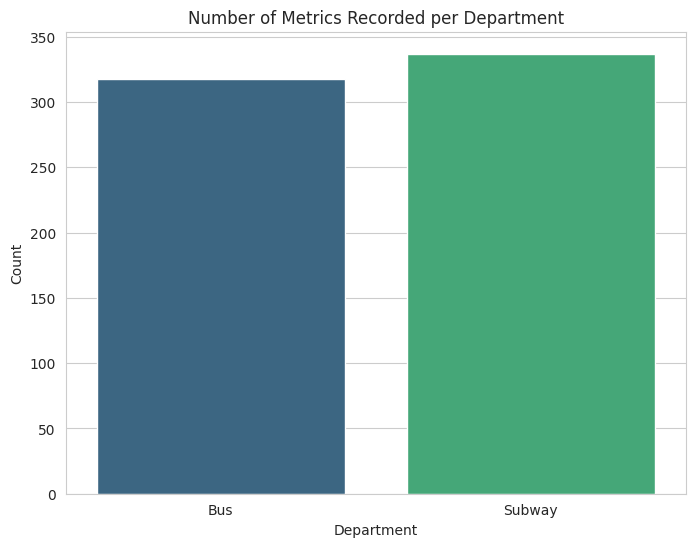

In [11]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Department', data=df, palette='viridis')
plt.title('Number of Metrics Recorded per Department')
plt.xlabel('Department')
plt.ylabel('Count')
plt.show()

# **✅ Observation:**
Subway department has slightly more metrics recorded than the Bus department.

The count for:

Bus is slightly over 315 entries

Subway is around 335 entries

# **💡 Explanation:**
# Balanced Data Collection:

Both departments have similar amounts of data, indicating a relatively balanced dataset, which is good for analysis and comparison.

# Slightly More Subway Data:

The Subway department has a slightly higher number of metric entries. This could be due to:

More safety events being recorded

More types of metrics being tracked

Or more consistent monthly reporting

# Implication for Modeling:

Because the counts are close, any classification or department-based analysis won't be biased heavily due to data imbalance.
Example Insight:

If the "Operations" department has the highest count, it may be under closer scrutiny due to safety-critical responsibilities.

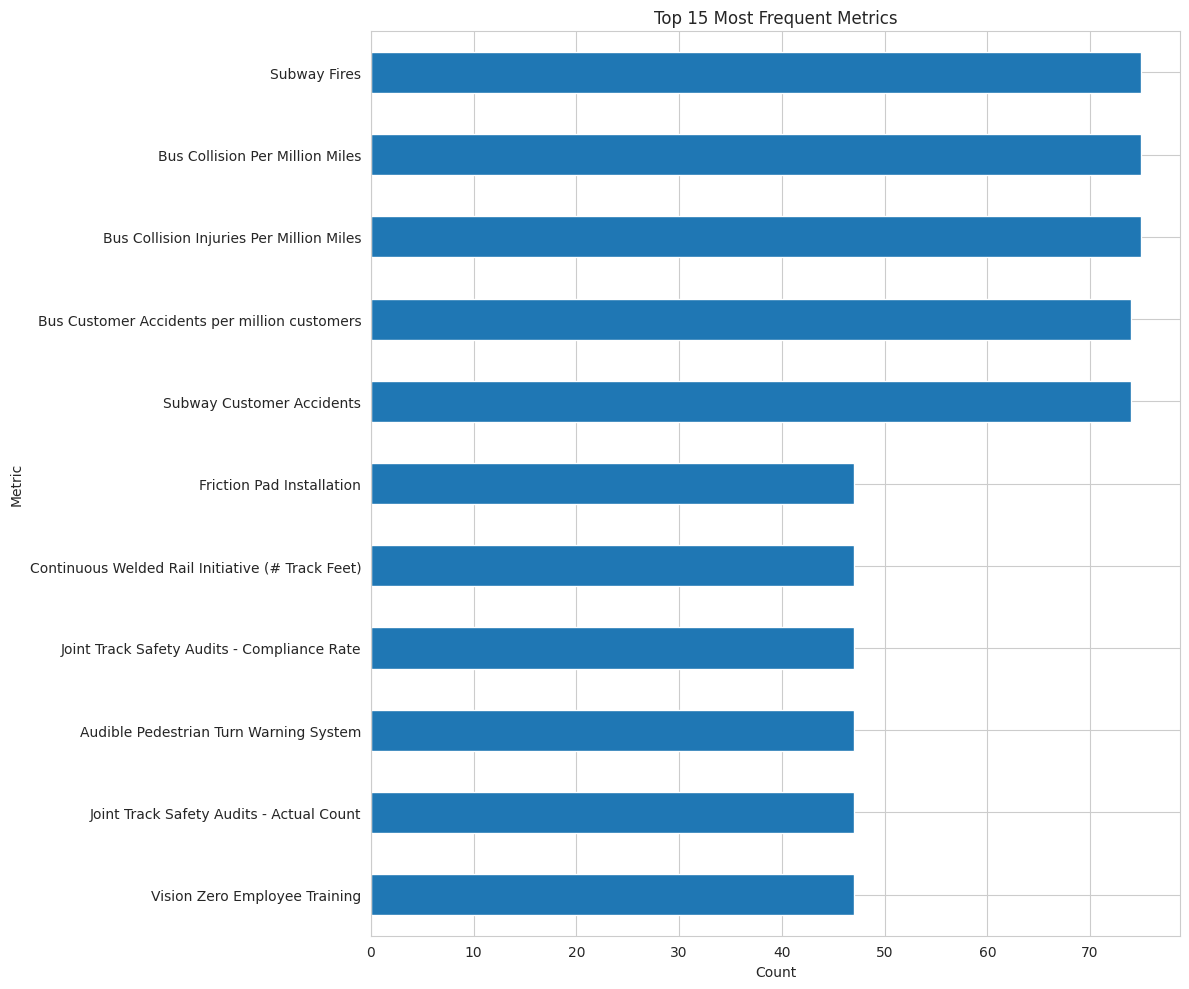

In [12]:
plt.figure(figsize=(12, 10))
df['Metric'].value_counts().nlargest(15).sort_values(ascending=True).plot(kind='barh')
plt.title('Top 15 Most Frequent Metrics')
plt.xlabel('Count')
plt.ylabel('Metric')
plt.tight_layout() # Adjusts plot to ensure everything fits without overlapping
plt.show()

# **✅ Observations:**
The most frequently recorded metrics are:

Subway Fires

Bus Collision Per Million Miles

Bus Collision Injuries Per Million Miles

Bus Customer Accidents per Million Customers

Subway Customer Accidents

All of the top 5 metrics appear more than 70 times in the dataset.

The remaining 10 metrics — including Friction Pad Installation, Joint Track Safety Audits, Vision Zero Employee Training, etc. — appear roughly 45 times each.

# **💡 Explanations:**
# Operational Focus Areas:

The MTA appears to consistently monitor high-impact and safety-critical metrics such as collisions, injuries, and fires. These are likely directly tied to rider safety and service quality.

# Bus vs. Subway Coverage:

The top 5 metrics are split between Bus (3) and Subway (2), indicating both departments face critical safety issues that are regularly monitored.

# Data Richness for Modeling:

Metrics with higher frequency can be used as strong predictors or form the basis for time-series forecasting, trend analysis, or classification models.

# Safety Audits and Maintenance Metrics:

Lower-ranked metrics like Track Audits or Training Programs show attention to internal safety and compliance measures, not just incident outcomes.

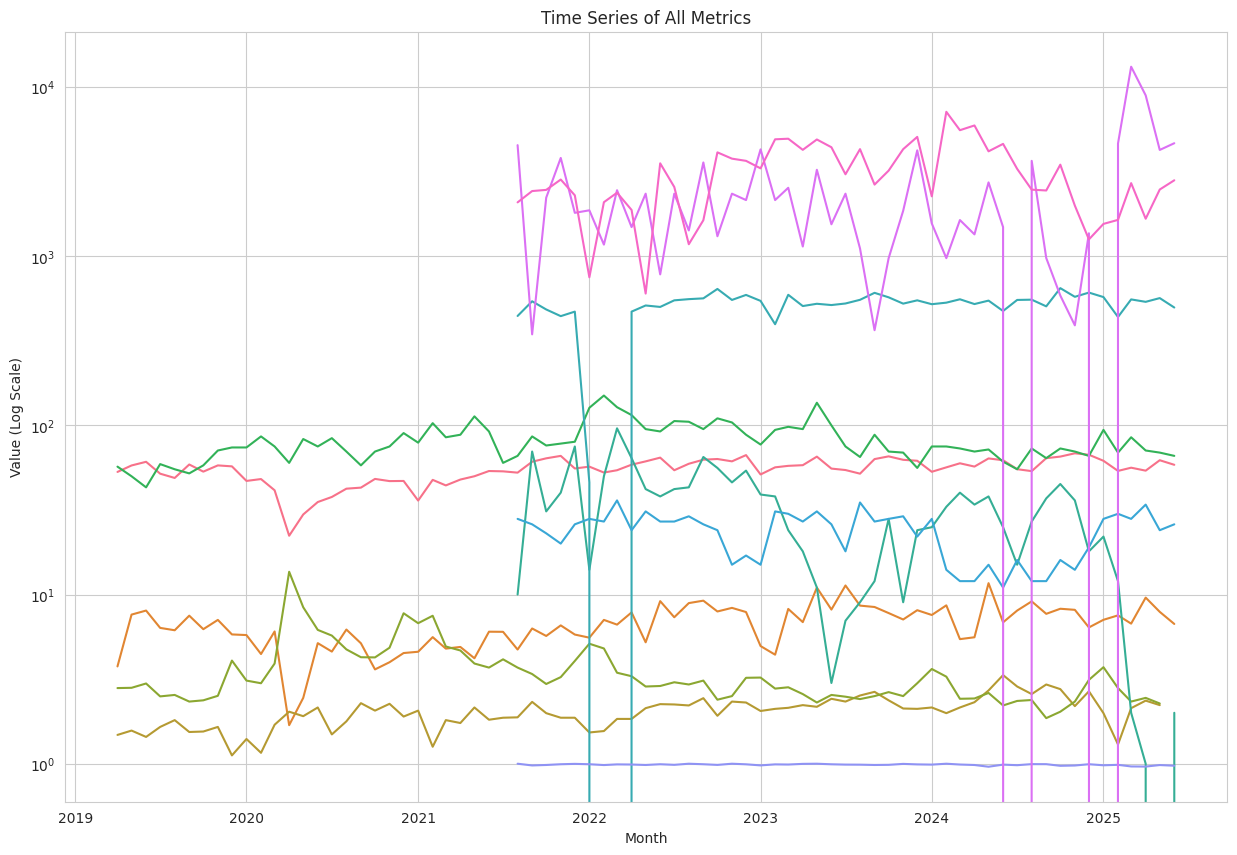

In [13]:
plt.figure(figsize=(15, 10))
sns.lineplot(x='Month', y='Value', hue='Metric', data=df, legend=False) # legend=False to avoid clutter
plt.title('Time Series of All Metrics')
plt.xlabel('Month')
plt.ylabel('Value (Log Scale)')
plt.yscale('log') # Use a log scale for the y-axis
plt.show()


# **✅ Observations:**
Multiple Distinct Layers:

Some metrics operate in very high ranges (thousands to tens of thousands).

Others remain in medium (hundreds) or low (1–10) ranges.

# Top Curves (High Magnitude):

These represent metrics like:

Subway Fires

Track Feet Laid

Possibly Vision Zero Employee Training or others with large unit values.

These show large fluctuations, suggesting irregular or bursty activity (e.g., mass training sessions or reactive maintenance).

# Mid-Range Metrics:

Include accident rates and collisions.

Generally stable but may have slight rising/falling trends.

# Low-Value Metrics:

Metrics such as injuries per million miles or audits show smaller numerical values and are relatively stable over time.

2020–2021 Drop (Possible COVID-19 Effect):

Some metrics drop noticeably or become erratic during 2020–2021, which could be due to reduced ridership, paused training, or scaled-back operations during the pandemic.

# Data Gaps & Spikes:

Certain metrics show sudden drops or spikes, especially around 2022–2025.

Could be due to missing entries, data errors, or irregular reporting.

# **💡 Explanation:**
The log scale helps visualize a wide range of values without losing low-magnitude detail.

Consistent metrics indicate routine tracking, while spiky trends may need further investigation.

This plot helps in identifying:

Which metrics are stable vs volatile

Seasonal or yearly trends

Potential anomalies for deeper inspection

/tmp/ipython-input-16-1758912442.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y='Metric', x='Value', data=df, orient='h', palette='crest')


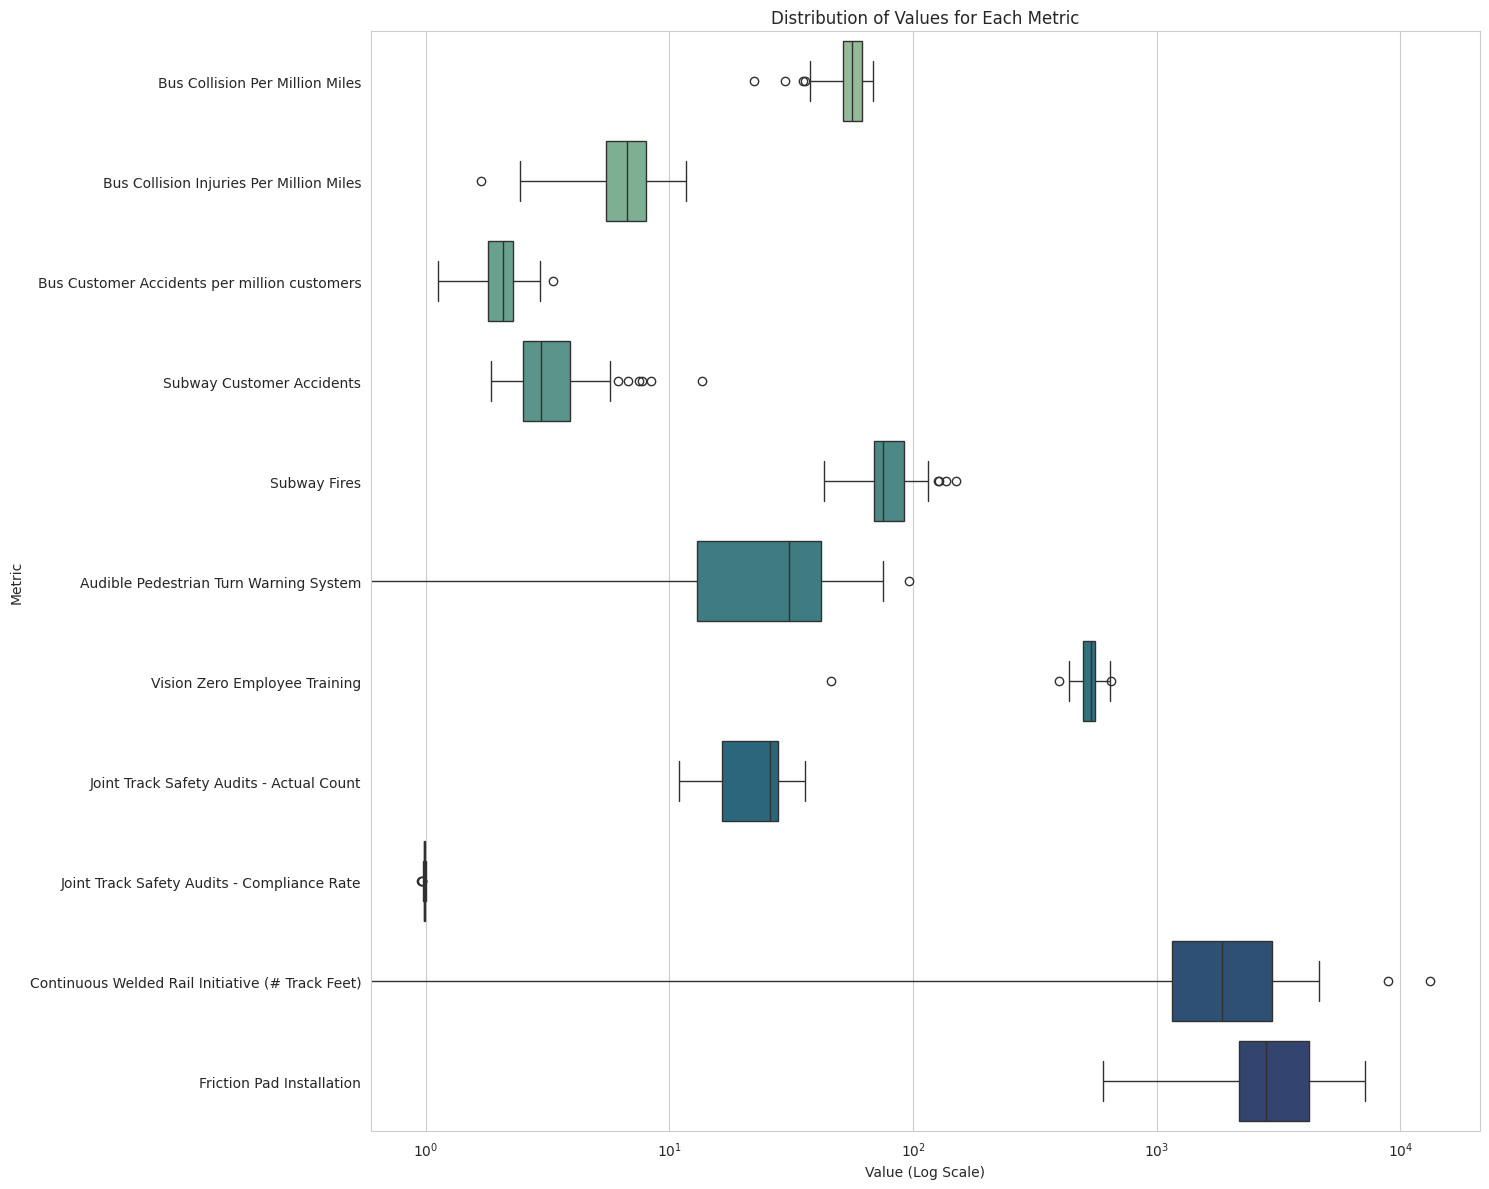

In [16]:
plt.figure(figsize=(15, 12))
sns.boxplot(y='Metric', x='Value', data=df, orient='h', palette='crest')
plt.title('Distribution of Values for Each Metric')
plt.xlabel('Value (Log Scale)')
plt.ylabel('Metric')
plt.xscale('log') # Use a log scale for the x-axis
plt.tight_layout()
plt.show()

# **🔍 Observation:**
# Low-Value Metrics (on the far left, lower end of log scale):

Bus Collision Per Million Miles, Bus Collision Injuries Per Million Miles, Bus Customer Accidents, and Subway Customer Accidents have relatively low median values (closer to 1–10 on the log scale).

These also have low variability, with only a few outliers.

# Moderate-Value Metrics (middle of log scale):

Audible Pedestrian Turn Warning System, Subway Fires, Vision Zero Employee Training, Joint Track Safety Audits (Actual & Compliance) have median values ranging from 10 to 100s.

Audible Pedestrian Turn Warning System shows a large spread, suggesting significant variation in implementation across periods or locations.

# High-Value Metrics (far right of log scale):

Continuous Welded Rail Initiative and Friction Pad Installation stand out with very high median values in the range of 1,000 to 10,000.

They also show wide interquartile ranges (IQRs) and numerous outliers, indicating high variability in track infrastructure initiatives.

# **💡 Explanation:**
# Safety-Related Metrics (Collisions, Accidents, Fires):

These metrics naturally occur at lower frequencies (per million miles or per customer basis) — hence, their values are low but crucial.

Their tight clustering and limited spread suggest relatively consistent safety performance, though the presence of outliers (especially in Subway Customer Accidents) may indicate occasional spikes.

# Implementation Programs (Training, Warning Systems):

Mid-range values with moderate to high variance (like the Audible Pedestrian Turn Warning System) suggest differences in how widely or consistently these programs are deployed — possibly due to budget, location, or urgency factors.

# Infrastructure Projects (Rail Welding, Friction Pads):

These have the largest values and greatest variance, which makes sense as infrastructure rollouts vary significantly based on network size, maintenance schedules, and long-term capital projects.

The log scale helps compress this wide variance visually, but the range shows that investment or implementation here is massive compared to safety training or audits.